### 문화 공간 데이터 준비

In [1]:
import pandas as pd

In [2]:
df_exhibit = pd.read_csv('data/문화공간(전시시설).csv')
df = df_exhibit.copy()

# 데이터 확인
df_exhibit.head()


,자치구별(1),자치구별(2),2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,자치구별(1),자치구별(2),박물관,미술관,박물관,미술관,박물관,미술관,박물관,미술관,박물관,미술관
1,합계,소계,128,46,132,46,134,46,136,46,135,47
2,합계,종로구,35,18,37,18,38,18,38,20,39,19
3,합계,중구,17,2,17,2,17,2,17,1,17,3
4,합계,용산구,7,5,7,5,8,5,8,5,8,4


In [3]:
# 필요한 컬럼만 필터링
df = df[["자치구별(2)", "2023", "2023.1"]]
df.head()

,자치구별(2),2023,2023.1
0,자치구별(2),박물관,미술관
1,소계,135,47
2,종로구,39,19
3,중구,17,3
4,용산구,8,4


In [4]:
# 모든 자치구가 있는지 확인
df

,자치구별(2),2023,2023.1
0,자치구별(2),박물관,미술관
1,소계,135,47
2,종로구,39,19
3,중구,17,3
4,용산구,8,4
5,성동구,2,2
6,광진구,3,-
7,동대문구,5,-
8,중랑구,-,-
9,성북구,9,2


In [5]:
# "-"를 0으로 변환
df1 = df.copy()
df1 = df1.replace('-', 0)

# 숫자형으로 변환 (필요 시)
df1 = df1.apply(pd.to_numeric, errors='ignore')

# 0번째 행을 컬럼으로 지정
df1.columns = df1.iloc[0]

# 1번째 행부터 데이터만 사용
df1 = df1.iloc[2:].reset_index(drop=True)
df1.reset_index(drop=True, inplace=True)

# 변수명 맞추기
df1 = df1.rename(columns={'자치구별(2)': '자치구'})

df1

,자치구,박물관,미술관
0,종로구,39,19
1,중구,17,3
2,용산구,8,4
3,성동구,2,2
4,광진구,3,0
5,동대문구,5,0
6,중랑구,0,0
7,성북구,9,2
8,강북구,3,0
9,도봉구,2,0


#### 

### 등록 인구 데이터 준비

In [9]:
df_pop = pd.read_csv("data/등록인구(연령별_동별).csv")

In [10]:
# 불필요한 데이터 필터링
df = df_pop[['동별(1)', '항목', '2023']].copy()

# 인덱스 0~3 제거
df = df.iloc[4:].reset_index(drop=True)

# 2. '항목' 컬럼이 '계'인 행만 필터링 -> '항목' 컬럼 제거
df_pop2 = df[df['항목'] == '계'].copy()
df_pop3 = df_pop2.drop(columns=['항목'])

# 인덱스 재설정
df_pop3.reset_index(drop=True, inplace=True)

# 컬럼명 맞추기
df_pop3 = df_pop3.rename(columns={'동별(1)': '자치구'})
df_pop3 = df_pop3.rename(columns={'2023': '인구 수'})

df_pop3.head()

,자치구,인구 수
0,종로구,150453
1,중구,131793
2,용산구,227106
3,성동구,284766
4,광진구,351180


In [11]:
df_pop3.to_csv("./data/자치구별_인구수.csv", index=False, encoding='utf-8-sig')


In [12]:
df_pop3

,자치구,인구 수
0,종로구,150453
1,중구,131793
2,용산구,227106
3,성동구,284766
4,광진구,351180
5,동대문구,359873
6,중랑구,387470
7,성북구,438168
8,강북구,292977
9,도봉구,309494


#### 

## 문화공간 데이터와 등록 인구 데이터 병합

In [13]:
# 자치구 기준으로 병합
merged_df = pd.merge(df1, df_pop3, on='자치구', how='inner')
df_m = merged_df.copy()
merged_df.head()

,자치구,박물관,미술관,인구 수
0,종로구,39,19,150453
1,중구,17,3,131793
2,용산구,8,4,227106
3,성동구,2,2,284766
4,광진구,3,0,351180


In [14]:
# 숫자형 데이터로 변환
merged_df['박물관'] = merged_df['박물관'].astype(int)
merged_df['미술관'] = merged_df['미술관'].astype(int)
merged_df['인구 수'] = merged_df['인구 수'].astype(int)

# 문화인프라지수와 구분하기 위해 예술인프라지수로 정의
merged_df['예술인프라지수'] = (merged_df['미술관'] + merged_df['박물관']) / merged_df['인구 수']
merged_df.head()

,자치구,박물관,미술관,인구 수,예술인프라지수
0,종로구,39,19,150453,0.000386
1,중구,17,3,131793,0.000152
2,용산구,8,4,227106,0.000053
3,성동구,2,2,284766,0.000014
4,광진구,3,0,351180,0.000009


In [15]:
df_art = merged_df[["자치구", "예술인프라지수"]]
df_art.head()

,자치구,예술인프라지수
0,종로구,0.000386
1,중구,0.000152
2,용산구,0.000053
3,성동구,0.000014
4,광진구,0.000009


#### 

### 문화공간 데이터 시각화

In [16]:
# 시각화 준비
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


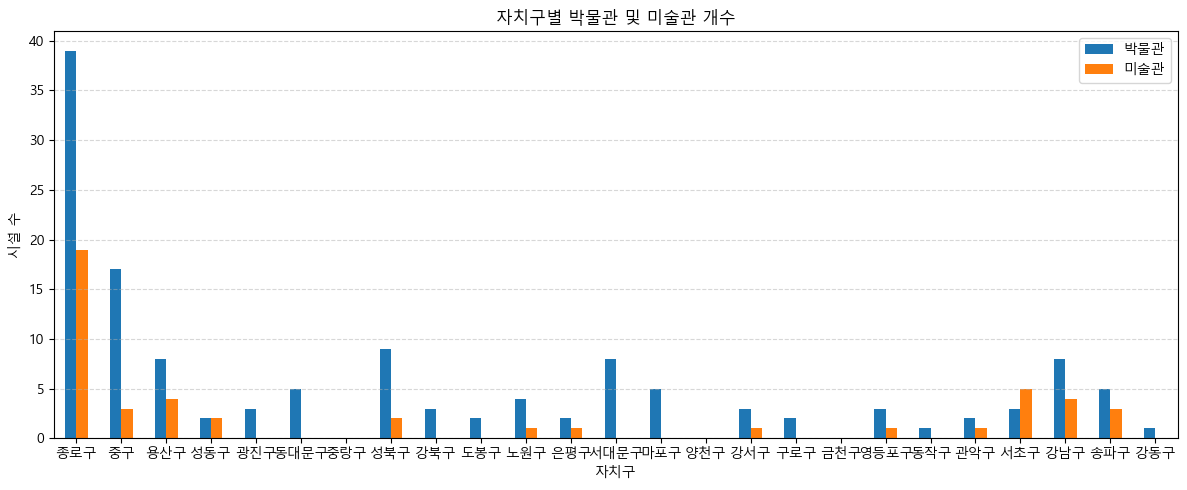

In [18]:
# 막대 그래프
merged_df.plot(
    x='자치구',
    y=['박물관', '미술관'],
    kind='bar',
    figsize=(12, 5),
    title='자치구별 박물관 및 미술관 개수'
)
plt.ylabel('시설 수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 

### csv 파일로 저징

In [19]:
df_art.to_csv("./data/자치구별_예술인프라지수.csv", index=False, encoding='utf-8-sig')
